# Setup

One time installation of latex

In [ ]:
# ! sudo apt-get install texlive-latex-recommended 
# ! sudo apt-get install dvipng texlive-latex-extra texlive-fonts-recommended  
# # ! wget http://mirrors.ctan.org/macros/latex/contrib/type1cm.zip 
# # ! unzip type1cm.zip -d /tmp/type1cm 
# ! cd /tmp/type1cm/type1cm/ && sudo latex type1cm.ins
# ! sudo mkdir /usr/share/texmf/tex/latex/type1cm 
# ! sudo cp /tmp/type1cm/type1cm/type1cm.sty /usr/share/texmf/tex/latex/type1cm 
# ! sudo texhash
# !apt install cm-super

Import all required Libraries

In [ ]:
%%time
from __future__ import division, print_function

# operating system interfaces
import os
import sys
import IPython
import IPython.display

# adding progress bar
!pip install tqdm==4.57.0
from tqdm import tqdm # !pip install tqdm==4.57.0
tqdm.pandas()

# libraries for data storage using np array and panel data of pandas. also library for scietific and statistical calculations
import numpy as np
import pandas as pd
import scipy.stats as stats
from scipy import stats
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import statsmodels.api as sm
from statsmodels.tsa import stattools

# to store objects as file
import pickle

# libraries for visaulization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objs as go

# framework for deep learning
import tensorflow as tf
from tensorflow import keras

!python --version
print("TensorFlow version {}".format(tf.__version__))
print("Keras version {}".format(keras.__version__))

     |████████████████████████████████| 72 kB 1.1 MB/s 
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.62.0
    Uninstalling tqdm-4.62.0:
      Successfully uninstalled tqdm-4.62.0


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Python 3.7.11
TensorFlow version 2.6.0
Keras version 2.6.0
CPU times: user 2.81 s, sys: 749 ms, total: 3.56 s
Wall time: 9.04 s


Configure the matplotlib plots

In [ ]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.

    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 475
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

In [ ]:
"""
    Set default figure size and dimensions.
"""
SMALL_SIZE = 8
MEDIUM_SIZE = 12
BIGGER_SIZE = 16

# With LaTex fonts
width = 'thesis'

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=SMALL_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=MEDIUM_SIZE)  # fontsize of the figure title

plt.rcParams['figure.figsize'] = set_size(width)  # default size of the figures for latex

Navigate and set required file paths and file names

In [ ]:
# changing working directory
work_dir = "/content/drive/My Drive/dataScience/projects/thesis/code"
data_dir = "/content/drive/My Drive/dataScience/projects/thesis/data"
output_dir = "/content/drive/My Drive/dataScience/projects/thesis/output"
os.chdir(work_dir)

# set file names to read
actual_generation_filename = data_dir + "/Actual_generation_202001010000_202012312359.csv"
phase_angle_filename = data_dir + "/All_2020-01-01T00_00_00.0-2020-12-31T23_59_59.9.csv"
afrr_germany_filename = data_dir + "/Automatic_Frequency_Restoration_Reserve_202001010000_202012312359.csv"
afrr_austria_filename = data_dir + "/Ausgleichsenergie_202001010000_202012312359.csv"

In [ ]:
# """
# Example of producing latex plots
# """

# # Initialise figure instance
# fig, ax = plt.subplots()

# # data
# x = np.arange(0, 10, 0.1)
# y = np.sin(x)
# z = np.cos(x)

# # Plot
# ax.plot(y, color='blue', label=r'$\sin (\theta)$')
# ax.plot(z, color='black', label=r'$\cos (\theta)$')
# plt.xlabel('Time')
# plt.ylabel('Intensity')

# # legend on the top. Title is written in the thesis report
# ax.legend(loc='lower left', bbox_to_anchor= (0.0, 1.01), ncol=2,
#             borderaxespad=0, frameon=False)

# # Save and remove excess whitespace
# fig.savefig('example_1.pdf', format='pdf', bbox_inches='tight')

In [ ]:
from util.helperFunctions import *

In [ ]:
# examples to use pre defined plot functions
# plot_heatmap(wind_generation_df, 'total_wind[MWh]', fig_name='')
# plot_series(wind_generation_df.index, wind_generation_df['total_wind[MWh]'], fig_name='wind')

imported function names:
*   read_wind_generation_data()
*   read_phase_angle_data()
*   read_afrr_data(Country)
`Country in "Germany" or "Austria"`
*   plot_series(time, series, fig_name='', format="-", start=0, end=None, label=None)
*   plot_series_with_plotly(time, series, fig_name='', start=0, end=None, rangeslider = True)
*   plot_heatmap(df, fig_name='', col_name, v_min=None, v_max=None)



# Read all the datasets

The read data functions include the following features
*   Read in the data in chunks if the dataset is too large
*   Convert the column types to suitabe datatypes
*   Initial data cleaning
*   Create date time index
*   Renaming of columns for convenience
*   Resampling of phase angle data to 15 minutes




## Read raw data
Use the below read_sample_csv_data function to read small chunks of large datasets and save sample data in tex files

In [ ]:
def read_sample_csv_data(filename, sep = ';', rows_to_read = 10, rows_to_skip = 0):
    df = pd.read_csv(filename, sep=sep, skiprows=rows_to_skip, nrows=rows_to_read, dtype=str)
    return df

In [ ]:
def save_as_tex(df, fname):
    with open(output_dir + "/"+ fname +".tex", "w") as f:
        f.write(df.to_latex())

In [ ]:
# read_sample_csv_data(actual_generation_filename)[read_sample_csv_data(actual_generation_filename).columns[0:7]]

In [ ]:
save_as_tex(df = read_sample_csv_data(actual_generation_filename)[['Date', 'Time of day', 'Wind offshore[MWh]', 'Wind onshore[MWh]']], fname = 'total_generation_raw')

In [ ]:
save_as_tex(df = read_sample_csv_data(phase_angle_filename, sep = ',', rows_to_skip=1), fname = 'phase_angle_raw')

In [ ]:
save_as_tex(df = read_sample_csv_data(afrr_germany_filename)[["Date", "Time of day", "Volume of activated balancing services (+)[MWh]", "Volume of activated balancing services (-)[MWh]"]], fname = 'afrr_germany_raw')

In [ ]:
save_as_tex(df = read_sample_csv_data(afrr_austria_filename)[["Datum", "Uhrzeit", "Ausgleichsvolumen (+)[MWh]", "Ausgleichvolumen (-)[MWh]"]], fname = 'afrr_austria_raw')

## Data Preprocessing
Following are the dataframe names

*   wind_generation_df
 * add 'Wind offshore[MWh]' and 'Wind onshore[MWh]' to obtain total generated wind energy
 * already sampled at 15 minutes
 * add datetime index with freq = 15T


*   phase_angle_df
 * calc phase diff between Bremen and Schondorf
 * calc sin (phase diff) between Bremen and Schondorf
 * resample at 15 minutes
 * add datetime index with freq = 15T

*   afrr_germany_df
 * already sampled at 15 minutes
 * add datetime index with freq = 15T

*   afrr_austria_df
 * already sampled at 15 minutes
 * add datetime index with freq = 15T

In [ ]:
wind_generation_df = read_wind_generation_data()

reading data from saved file /content/drive/My Drive/dataScience/projects/thesis/data/wind_generation_df.pkl


In [ ]:
phase_angle_df = read_phase_angle_data()

reading data from saved file /content/drive/My Drive/dataScience/projects/thesis/data/phase_angle_df.pkl


In [ ]:
afrr_germany_df = read_afrr_data(Country = "Germany")

reading data from saved file /content/drive/My Drive/dataScience/projects/thesis/data/afrr_germany_df.pkl


In [ ]:
afrr_austria_df = read_afrr_data(Country = "Austria")

reading data from saved file /content/drive/My Drive/dataScience/projects/thesis/data/afrr_austria_df.pkl


### Handling Missing Data

Check if all the datasets have the same datetime index period, frequency and shape


*   For time stamps, Pandas provides the Timestamp type. As mentioned before, it is essentially a replacement for Python's native datetime, but is based on the more efficient numpy.datetime64 data type. The associated Index structure is DatetimeIndex.

*   For time Periods, Pandas provides the Period type. This encodes a fixed-frequency interval based on numpy.datetime64. The associated index structure is PeriodIndex.

*   For time deltas or durations, Pandas provides the Timedelta type. Timedelta is a more efficient replacement for Python's native datetime.timedelta type, and is based on numpy.timedelta64. The associated index structure is TimedeltaIndex.

In [ ]:
summarize_data(wind_generation_df)

,count,count_unique,miss_val,miss_pct,index_min,index_max
column_name,,,,,,
Datetime,35136,35132,0,0.0,2020-01-01 00:00,2020-12-31 23:45
Week,35136,53,0,0.0,2020-01-01 00:00,2020-12-31 23:45
Month,35136,12,0,0.0,2020-01-01 00:00,2020-12-31 23:45
total_wind[MWh],35136,9477,0,0.0,2020-01-01 00:00,2020-12-31 23:45


In [ ]:
summarize_data(phase_angle_df)

,count,count_unique,miss_val,miss_pct,index_min,index_max
column_name,,,,,,
phase_diff,35136,20247,536,1.525501,2020-01-01 00:00,2020-12-31 23:45
sin_delta,35136,34600,536,1.525501,2020-01-01 00:00,2020-12-31 23:45
Bremen,35136,24746,526,1.497040,2020-01-01 00:00,2020-12-31 23:45
Schondorf,35136,24923,10,0.028461,2020-01-01 00:00,2020-12-31 23:45
Datetime,35136,35136,0,0.000000,2020-01-01 00:00,2020-12-31 23:45
Week,35136,53,0,0.000000,2020-01-01 00:00,2020-12-31 23:45
Month,35136,12,0,0.000000,2020-01-01 00:00,2020-12-31 23:45


Only phase angle df has missing data
526/35136 rows are missing for Bremen and 10/35136 are missing for Schondorf

Imputing the missing data

Methods for Imputation

1. Forward Fill
```
The backward method fills the missing values in the dataset and uses the
next valid observation to fill the gap.
```
2. Backward Fill
```
The forward fill method propagates the last valid observation forward to
the next valid one.
```
3. Linear Interpolation 
```
interpolates values linearly in a forward, backward or both directions
```
4. Cubic Interpolation
```
interpolates values quadratically in a forward, backward or both directions
```
5. Time Interploation
```
interpolates values with respect to time in a forward, backward or both directions
```


**Bremen** - Here the data is miisng at the beginneing and has no prior values. Therefore, more meanigful and suitable method here would be to back fill the data with next 526 rows. The data throught the Jan month would be similar each week without much difference.

**Schondorf** - Here only 10 data points are missing in the middle. Therfore, time interploation method would be more suitable.

In [ ]:
# Schondorf data imputation
phase_angle_df["Schondorf"].interpolate(method='time', limit_direction='both', axis=0, inplace=True)

In [ ]:
# Bremen data imputation
phase_angle_df.loc[:"2020-01-06 11:30:00", ("Bremen")] = phase_angle_df.loc["2020-01-06 11:30:00": "2020-01-11 23:00:00", ("Bremen")].values

In [ ]:
# calc phase angle and sin delta for missing values
phase_angle_df.loc[phase_angle_df['phase_diff'].isnull(), ('phase_diff')] = (phase_angle_df.loc[phase_angle_df['phase_diff'].isnull(), ("Bremen")] - phase_angle_df.loc[phase_angle_df['phase_diff'].isnull(), ("Schondorf")].values)
phase_angle_df.loc[phase_angle_df['sin_delta'].isnull(), ('sin_delta')] = np.sin(np.deg2rad((phase_angle_df.loc[phase_angle_df['sin_delta'].isnull(), ("phase_diff")]).values))

In [ ]:
summarize_data(phase_angle_df)

,count,count_unique,miss_val,miss_pct,index_min,index_max
column_name,,,,,,
Datetime,35136,35136,0,0.0,2020-01-01 00:00,2020-12-31 23:45
Week,35136,53,0,0.0,2020-01-01 00:00,2020-12-31 23:45
Month,35136,12,0,0.0,2020-01-01 00:00,2020-12-31 23:45
Schondorf,35136,24933,0,0.0,2020-01-01 00:00,2020-12-31 23:45
Bremen,35136,24746,0,0.0,2020-01-01 00:00,2020-12-31 23:45
phase_diff,35136,20775,0,0.0,2020-01-01 00:00,2020-12-31 23:45
sin_delta,35136,35132,0,0.0,2020-01-01 00:00,2020-12-31 23:45


In [ ]:
summarize_data(afrr_germany_df)

,count,count_unique,miss_val,miss_pct,index_min,index_max
column_name,,,,,,
Datetime,35136,35132,0,0.0,2020-01-01 00:00,2020-12-31 23:45
Week,35136,53,0,0.0,2020-01-01 00:00,2020-12-31 23:45
Month,35136,12,0,0.0,2020-01-01 00:00,2020-12-31 23:45
pos_de,35136,357,0,0.0,2020-01-01 00:00,2020-12-31 23:45
neg_de,35136,351,0,0.0,2020-01-01 00:00,2020-12-31 23:45
net_de,35136,386,0,0.0,2020-01-01 00:00,2020-12-31 23:45


In [ ]:
summarize_data(afrr_austria_df)

,count,count_unique,miss_val,miss_pct,index_min,index_max
column_name,,,,,,
Datetime,35136,35132,0,0.0,2020-01-01 00:00,2020-12-31 23:45
Week,35136,53,0,0.0,2020-01-01 00:00,2020-12-31 23:45
Month,35136,12,0,0.0,2020-01-01 00:00,2020-12-31 23:45
pos_au,35136,167,0,0.0,2020-01-01 00:00,2020-12-31 23:45
neg_au,35136,189,0,0.0,2020-01-01 00:00,2020-12-31 23:45
net_au,35136,197,0,0.0,2020-01-01 00:00,2020-12-31 23:45


Write all dataframes to tex files

In [ ]:
# save_as_tex(df = wind_generation_df.head(10)[['total_wind[MWh]']], fname = 'wind_generation')

In [ ]:
# save_as_tex(df = phase_angle_df.head(10)[['Schondorf', 'Bremen', 'phase_diff', 'sin_delta']], fname = 'phase_angle')

In [ ]:
# save_as_tex(df = afrr_germany_df.head(10)[['pos_de', 'neg_de', 'net_de']], fname = 'afrr_germany')

In [ ]:
# save_as_tex(df = afrr_austria_df.head(10)[['pos_au', 'neg_au', 'net_au']], fname = 'afrr_austria')

# Data Preparation


## Explore Time Series Data

1. Line Plots.
2. Histograms and Density Plots.
3. Box and Whisker Plots.
4. Heat Maps.
5. Lag Plots or Scatter Plots.
6. Autocorrelation Plots.

The autocorrelation plot is useful to check the presence of statistically significant autocorrelation in a time series.

No handles with labels found to put in legend.


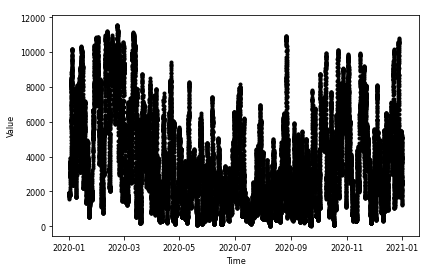

In [ ]:
plot_series(wind_generation_df.index, wind_generation_df['total_wind[MWh]'], format = 'k.', fig_name = 'wind_energy_line_plot')

No handles with labels found to put in legend.


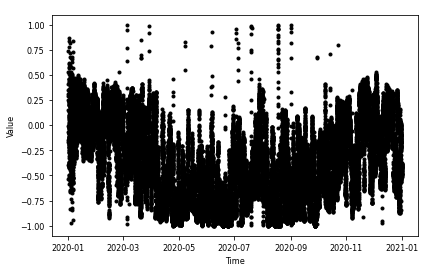

In [ ]:
plot_series(phase_angle_df.index, phase_angle_df['sin_delta'], format = 'k.', fig_name = 'phase_angle_line_plot')

No handles with labels found to put in legend.


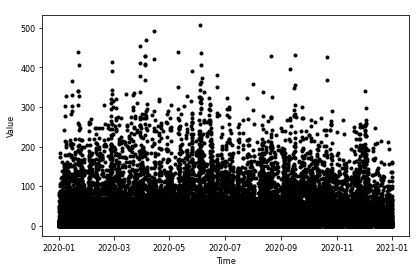

In [ ]:
plot_series(afrr_germany_df.index, afrr_germany_df['pos_de'], format = 'k.', fig_name = 'afrr_germany_pos_line_plot')

No handles with labels found to put in legend.


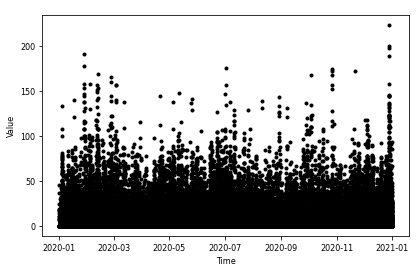

In [ ]:
plot_series(afrr_austria_df.index, afrr_austria_df['pos_au'], format = 'k.', fig_name = 'afrr_austria_pos_line_plot')

No handles with labels found to put in legend.


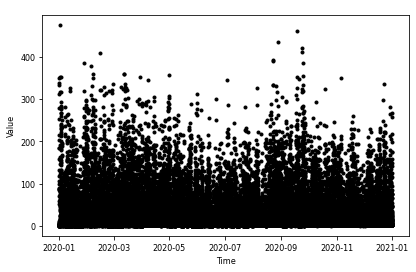

In [ ]:
plot_series(afrr_germany_df.index, afrr_germany_df['neg_de'], format = 'k.', fig_name = 'afrr_germany_neg_line_plot')

No handles with labels found to put in legend.


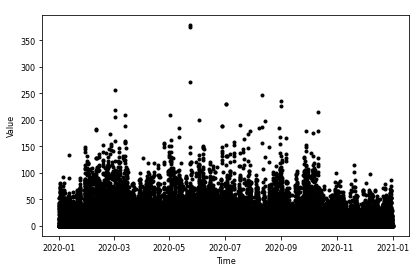

In [ ]:
plot_series(afrr_austria_df.index, afrr_austria_df['neg_au'], format = 'k.', fig_name = 'afrr_austria_neg_line_plot')

No handles with labels found to put in legend.


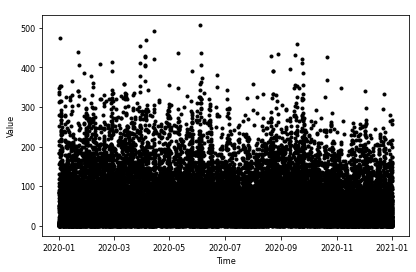

In [ ]:
plot_series(afrr_germany_df.index, afrr_germany_df['net_de'], format = 'k.', fig_name = 'afrr_germany_net_line_plot')

No handles with labels found to put in legend.


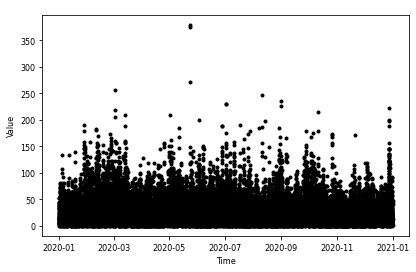

In [ ]:
plot_series(afrr_austria_df.index, afrr_austria_df['net_au'], format = 'k.', fig_name = 'afrr_austria_net_line_plot')

### Wind Energy Data

In [ ]:
series = wind_generation_df['total_wind[MWh]']

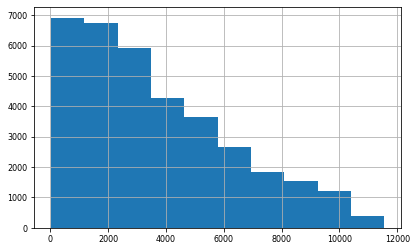

In [ ]:
series.hist()

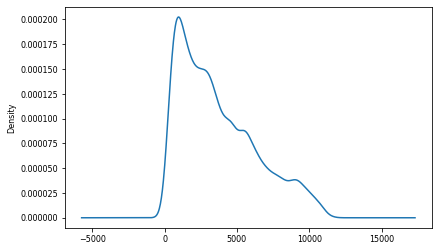

In [ ]:
series.plot(kind='kde')

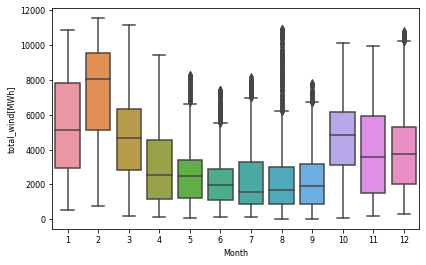

In [ ]:
sns.boxplot(x = 'Month', y = 'total_wind[MWh]', data=wind_generation_df)

No handles with labels found to put in legend.


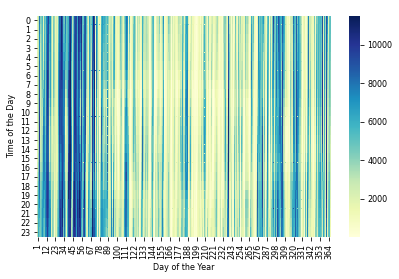

In [ ]:
plot_heatmap(wind_generation_df, 'total_wind[MWh]', fig_name = 'wind_energy_heat_map')

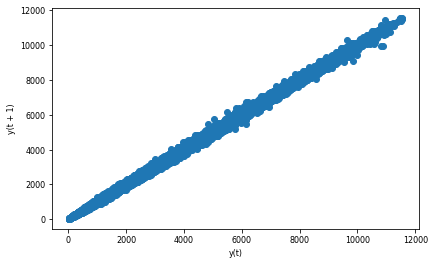

In [ ]:
pd.plotting.lag_plot(series)

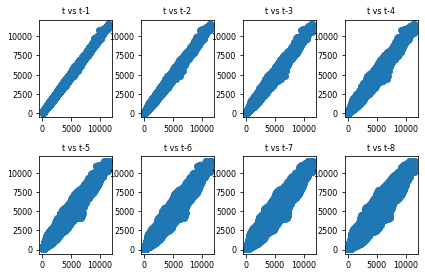

In [ ]:
values = pd.DataFrame(series.values)
lags = 8
columns = [values]

for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t']

for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
# plt.figure(1)

for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
# Save and remove excess whitespace
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.savefig(output_dir + 'wind_energy_lag_scatter_plots' + ".pdf", format='pdf', bbox_inches='tight')

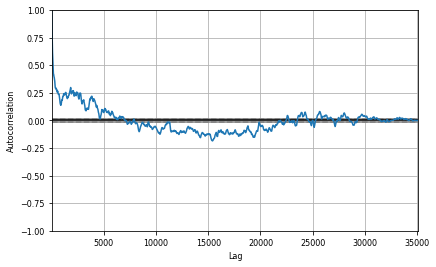

In [ ]:
pd.plotting.autocorrelation_plot(series)
plt.savefig(output_dir + 'wind_energy_acf' + ".pdf", format='pdf', bbox_inches='tight')

In [ ]:
adf_result = stattools.adfuller(series, autolag='AIC')
if adf_result[1] > 0.05 :
  print('Series is not Stationary and p-value is {}'.format(adf_result[1]))
else:
  print('Series is Stationary and p-value is {}'.format(adf_result[1]))

Series is Stationary and p-value is 9.04188242255438e-18


In [ ]:
wind_energy_decompose_model = seasonal_decompose(wind_generation_df['total_wind[MWh]'], model='additive', freq=24)

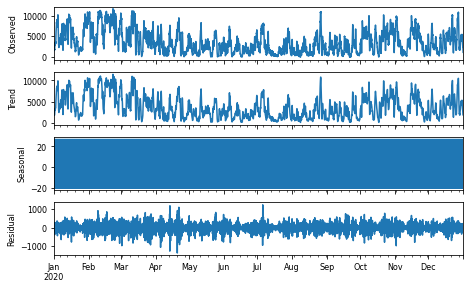

In [ ]:
wind_energy_decompose_model.plot()
plt.savefig(output_dir + 'wind_energy_decompose' + ".pdf", format='pdf', bbox_inches='tight')

The decompostion plot confirms the absense of clear seasonality component, which was also indicated by the adf test

### Phase Angle Data

In [ ]:
series = phase_angle_df['sin_delta']

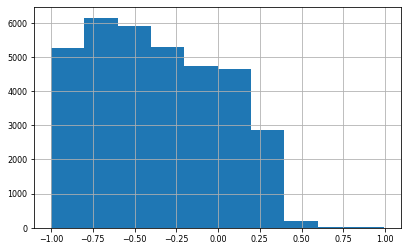

In [ ]:
series.hist()

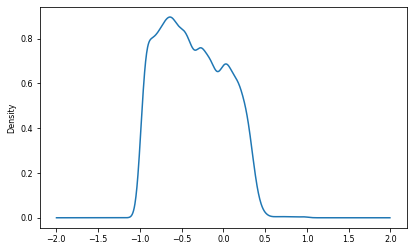

In [ ]:
series.plot(kind='kde')

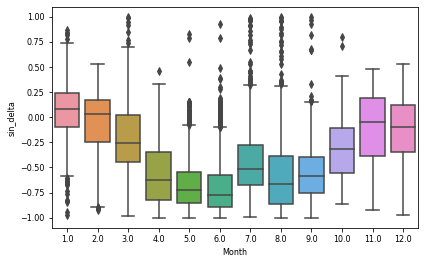

In [ ]:
sns.boxplot(x = 'Month', y = 'sin_delta', data=phase_angle_df)

No handles with labels found to put in legend.


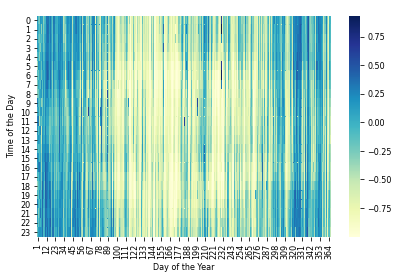

In [ ]:
plot_heatmap(phase_angle_df, 'sin_delta', fig_name = 'phase_angle_heat_map')

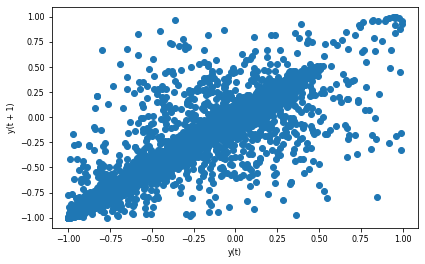

In [ ]:
# More points tighter in to the diagonal line suggests a stronger relationship and more spread from the line suggests a weaker relationship.
pd.plotting.lag_plot(series)

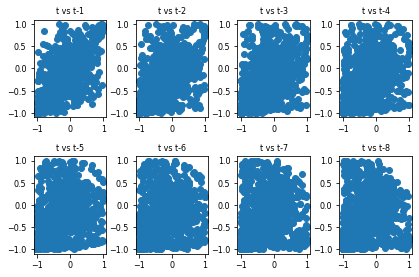

In [ ]:
values = pd.DataFrame(series.values)
lags = 8
columns = [values]

for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t']

for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
# plt.figure(1)

for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
# Save and remove excess whitespace
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.savefig(output_dir + 'phase_angle_lag_scatter_plots' + ".pdf", format='pdf', bbox_inches='tight')

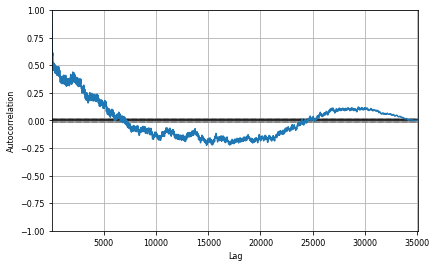

In [ ]:
pd.plotting.autocorrelation_plot(series)
plt.savefig(output_dir + 'phase_angle_acf' + ".pdf", format='pdf', bbox_inches='tight')

In [ ]:
phase_angle_decompose_model = seasonal_decompose(phase_angle_df['sin_delta'], model='additive', freq=24)

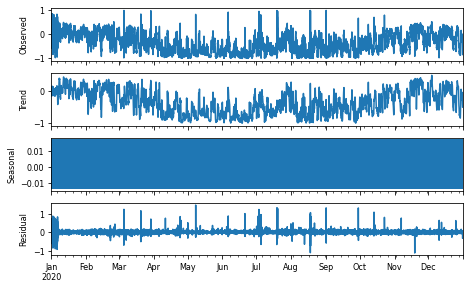

In [ ]:
phase_angle_decompose_model.plot()
plt.savefig(output_dir + 'phase_angle_decompose' + ".pdf", format='pdf', bbox_inches='tight')

### aFRR data Germany

In [ ]:
series = afrr_germany_df['pos_de']

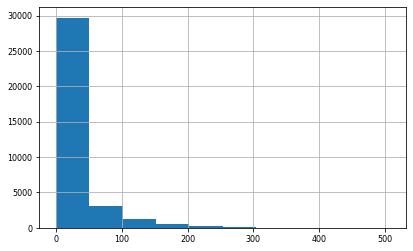

In [ ]:
series.hist()

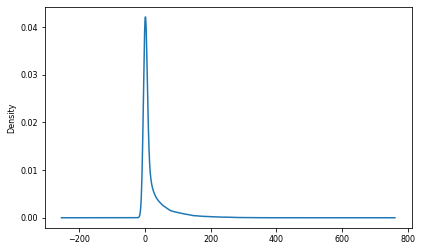

In [ ]:
series.plot(kind='kde')

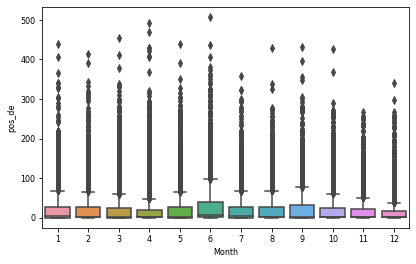

In [ ]:
sns.boxplot(x = 'Month', y = 'pos_de', data=afrr_germany_df)

No handles with labels found to put in legend.


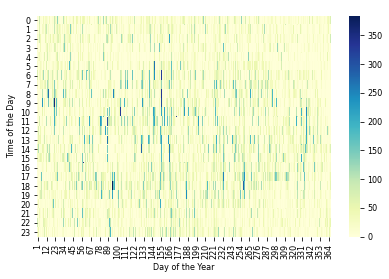

In [ ]:
plot_heatmap(afrr_germany_df, 'pos_de', fig_name = 'afrr_de_pos_heat_map')

No handles with labels found to put in legend.


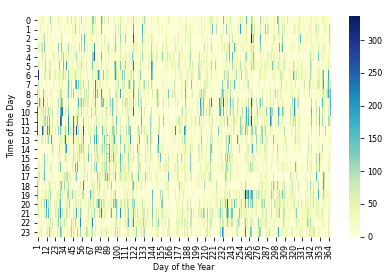

In [ ]:
plot_heatmap(afrr_germany_df, 'neg_de', fig_name = 'afrr_de_neg_heat_map')

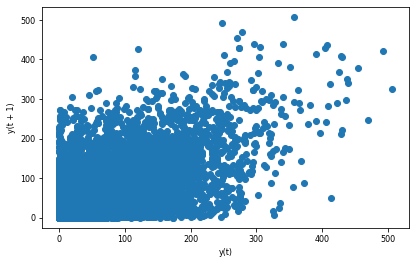

In [ ]:
# More points tighter in to the diagonal line suggests a stronger relationship and more spread from the line suggests a weaker relationship.
pd.plotting.lag_plot(series)

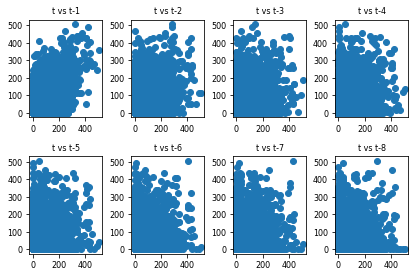

In [ ]:
values = pd.DataFrame(series.values)
lags = 8
columns = [values]

for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t']

for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
# plt.figure(1)

for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
# Save and remove excess whitespace
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.savefig(output_dir + 'afrr_de_pos_scatter_plots' + ".pdf", format='pdf', bbox_inches='tight')

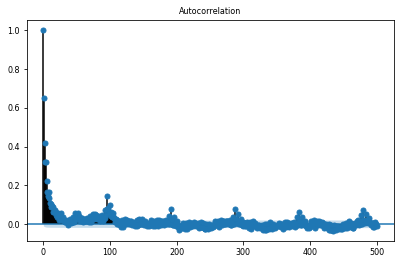

In [ ]:
sm.graphics.tsa.plot_acf(series, lags=500)
plt.show()

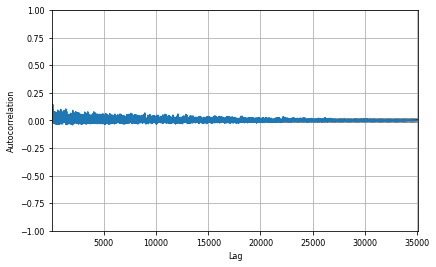

In [ ]:
pd.plotting.autocorrelation_plot(series)
plt.savefig(output_dir + 'afrr_de_pos_acf' + ".pdf", format='pdf', bbox_inches='tight')

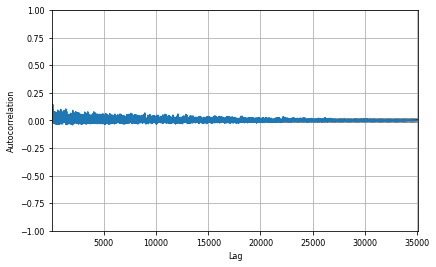

In [ ]:
pd.plotting.autocorrelation_plot(series)
plt.savefig(output_dir + 'afrr_de_pos_acf' + ".pdf", format='pdf', bbox_inches='tight')

In [ ]:
afrr_de_decompose_model = seasonal_decompose(afrr_germany_df['pos_de'], model='additive', freq=24)

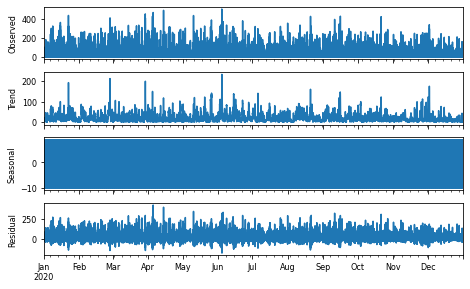

In [ ]:
afrr_de_decompose_model.plot()
plt.savefig(output_dir + 'afrr_de_decompose' + ".pdf", format='pdf', bbox_inches='tight')

In [ ]:
from statsmodels.tsa.stattools import adfuller, kpss, acf, pacf, grangercausalitytests

In [ ]:
# kpss test
# c- data is statinary around const
# ct - data is statioanry around a trend
stats, p, lags, critical_values = kpss(afrr_germany_df['pos_de'], 'ct')

# print the results
print(f'KPSS Test Statistics: {stats}')
print(f'p-value: {p}')
print(f'Critial Values: {critical_values}')

if p < 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

KPSS Test Statistics: 1.0375800784740319
p-value: 0.01
Critial Values: {'10%': 0.347, '5%': 0.463, '2.5%': 0.574, '1%': 0.739}
Series is not Stationary


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1685: FutureWarning:

The behavior of using lags=None will change in the next release. Currently lags=None is the same as lags='legacy', and so a sample-size lag length is used. After the next release, the default will change to be the same as lags='auto' which uses an automatic lag length selection method. To silence this warning, either use 'auto' or 'legacy'

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/stattools.py:1709: InterpolationWarning:

p-value is smaller than the indicated p-value



In [ ]:
# adf test
result = adfuller(afrr_germany_df['pos_de'])

# print the results
print(f'Test Statistics: {result[0]}')
print(f'p-value: {result[1]}')
print(f'Critial Values: {result[4]}')

if result[1] > 0.05 :
  print('Series is not Stationary')
else:
  print('Series is Stationary')

Test Statistics: -21.276008888203517
p-value: 0.0
Critial Values: {'1%': -3.43053640876008, '5%': -2.8616223880716523, '10%': -2.566813852580089}
Series is Stationary


### aFRR data Austria

In [ ]:
series = afrr_austria_df['pos_au']

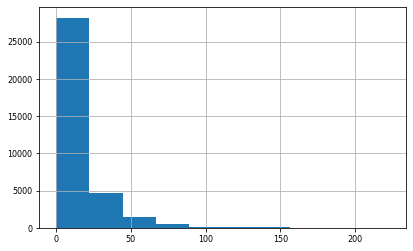

In [ ]:
series.hist()

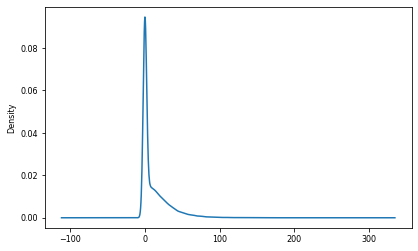

In [ ]:
series.plot(kind='kde')

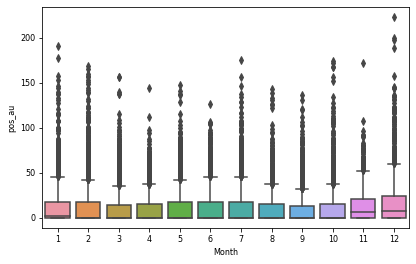

In [ ]:
sns.boxplot(x = 'Month', y = 'pos_au', data=afrr_austria_df)

No handles with labels found to put in legend.


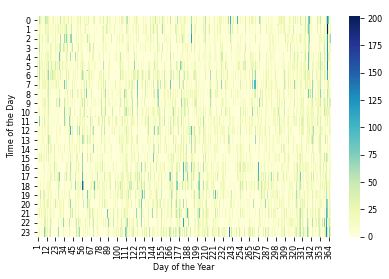

In [ ]:
plot_heatmap(afrr_austria_df, 'pos_au', fig_name = 'afrr_au_pos_heat_map')

No handles with labels found to put in legend.


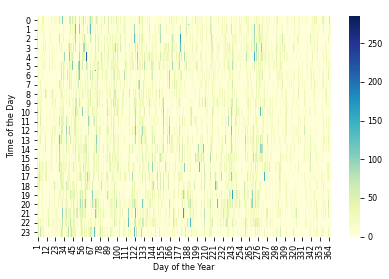

In [ ]:
plot_heatmap(afrr_austria_df, 'neg_au', fig_name = 'afrr_au_neg_heat_map')

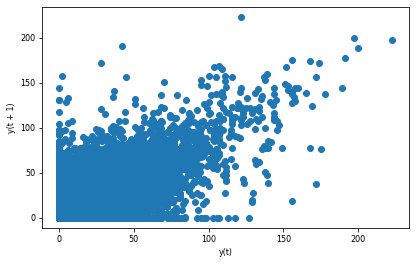

In [ ]:
# More points tighter in to the diagonal line suggests a stronger relationship and more spread from the line suggests a weaker relationship.
pd.plotting.lag_plot(series)

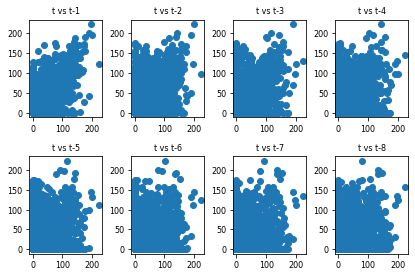

In [ ]:
values = pd.DataFrame(series.values)
lags = 8
columns = [values]

for i in range(1,(lags + 1)):
    columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t']

for i in range(1,(lags + 1)):
    columns.append('t-' + str(i))
dataframe.columns = columns
# plt.figure(1)

for i in range(1,(lags + 1)):
    ax = plt.subplot(240 + i)
    ax.set_title('t vs t-' + str(i))
    plt.scatter(x=dataframe['t'].values, y=dataframe['t-'+str(i)].values)
# Save and remove excess whitespace
# set the spacing between subplots
plt.subplots_adjust(left=0.1,
                    bottom=0.1, 
                    right=0.9, 
                    top=0.9, 
                    wspace=0.4, 
                    hspace=0.4)
plt.savefig(output_dir + 'afrr_au_pos_scatter_plots' + ".pdf", format='pdf', bbox_inches='tight')

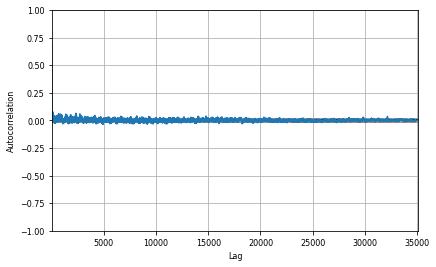

In [ ]:
pd.plotting.autocorrelation_plot(series)
plt.savefig(output_dir + 'afrr_au_pos_acf' + ".pdf", format='pdf', bbox_inches='tight')

In [ ]:
afrr_au_decompose_model = seasonal_decompose(afrr_austria_df['pos_au'], model='additive', freq=24)

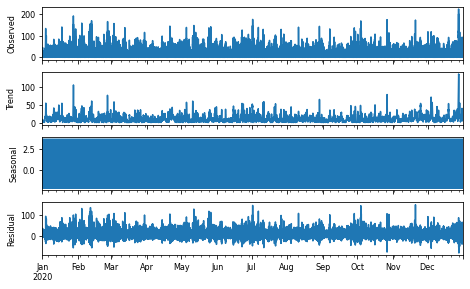

In [ ]:
afrr_au_decompose_model.plot()
plt.savefig(output_dir + 'afrr_au_decompose' + ".pdf", format='pdf', bbox_inches='tight')

### Multivariate Analysis

In [ ]:
combined_df = pd.merge(wind_generation_df[['total_wind[MWh]']], phase_angle_df[['sin_delta']], left_index=True, right_index=True)
combined_df = pd.merge(combined_df, afrr_germany_df[['pos_de', 'neg_de', 'net_de']], left_index=True, right_index=True)
combined_df = pd.merge(combined_df, afrr_austria_df[['pos_au', 'neg_au', 'net_au']], left_index=True, right_index=True)
combined_df.head()

,total_wind[MWh],sin_delta,pos_de,neg_de,net_de,pos_au,neg_au,net_au
2020-01-01 00:00:00,1597.0,-0.530318,15.0,11.0,4.0,10.0,0.0,10.0
2020-01-01 00:15:00,1596.0,0.310953,9.0,9.0,0.0,0.0,2.0,2.0
2020-01-01 00:30:00,1660.0,0.251431,6.0,3.0,3.0,0.0,6.0,6.0
2020-01-01 00:45:00,1721.0,0.533188,0.0,6.0,6.0,0.0,14.0,14.0
2020-01-01 01:00:00,1736.0,-0.162331,12.0,3.0,9.0,0.0,0.0,0.0


In [ ]:
summarize_data(combined_df)
# count of columns is same as all other datasets. It is good!

,count,count_unique,miss_val,miss_pct,index_min,index_max
column_name,,,,,,
total_wind[MWh],35136,9477,0,0.0,2020-01-01 00:00,2020-12-31 23:45
sin_delta,35136,35132,0,0.0,2020-01-01 00:00,2020-12-31 23:45
pos_de,35136,357,0,0.0,2020-01-01 00:00,2020-12-31 23:45
neg_de,35136,351,0,0.0,2020-01-01 00:00,2020-12-31 23:45
net_de,35136,386,0,0.0,2020-01-01 00:00,2020-12-31 23:45
pos_au,35136,167,0,0.0,2020-01-01 00:00,2020-12-31 23:45
neg_au,35136,189,0,0.0,2020-01-01 00:00,2020-12-31 23:45
net_au,35136,197,0,0.0,2020-01-01 00:00,2020-12-31 23:45


In [ ]:
combined_df.corr(method ='pearson')

,total_wind[MWh],sin_delta,pos_de,neg_de,net_de,pos_au,neg_au,net_au
total_wind[MWh],1.000000,0.723954,-0.066949,0.125617,0.052949,0.055748,0.060611,0.102619
sin_delta,0.723954,1.000000,-0.104468,0.092718,-0.005882,0.037047,-0.016445,0.014751
pos_de,-0.066949,-0.104468,1.000000,-0.282903,0.561798,0.124240,-0.082624,0.023579
neg_de,0.125617,0.092718,-0.282903,1.000000,0.624786,-0.091055,0.141248,0.058747
net_de,0.052949,-0.005882,0.561798,0.624786,1.000000,0.017606,0.055429,0.066598
pos_au,0.055748,0.037047,0.124240,-0.091055,0.017606,1.000000,-0.360258,0.476951
neg_au,0.060611,-0.016445,-0.082624,0.141248,0.055429,-0.360258,1.000000,0.648087
net_au,0.102619,0.014751,0.023579,0.058747,0.066598,0.476951,0.648087,1.000000


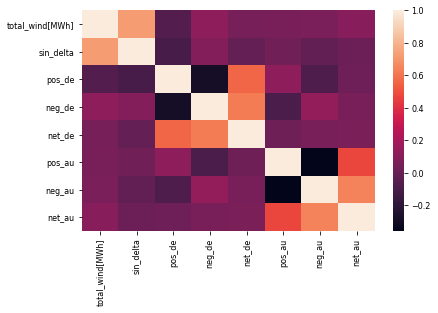

In [ ]:
# plot the heatmap
sns.heatmap(combined_df.corr(method ='pearson'), 
        xticklabels=combined_df.corr(method ='pearson').columns,
        yticklabels=combined_df.corr(method ='pearson').columns)

# Time Series Forecasting

## Feature Engineering
Before diving in to build a model it's important to understand your data, and be sure that you're passing the model appropriately formatted data.

**Time Series as Supervised Learning**

https://machinelearningmastery.com/how-to-load-visualize-and-explore-a-complex-multivariate-multistep-time-series-forecasting-dataset/

Depending on the choice of model, the input and target variables may benefit from some data preparation, such as:

*   Standardization.
*   Normalization.
*   Power Transform, where Gaussian.
*   Seasonal Differencing, where seasonal structures are present.

**Data windowing**

The LSTM or any sequence model will make a set of predictions based on a window of consecutive samples from the data. 

The main features of the input windows are:

* The width (number of time steps) of the input and label windows
* The time offset between them.
* Which features are used as inputs, labels, or both. 

This tutorial builds a variety of models (including Linear, DNN, CNN and RNN models), and uses them for both:

* *Single-output*, and *multi-output* predictions.
* *Single-time-step* and *multi-time-step* predictions.

This section focuses on implementing the data windowing so that it can be reused for all of those models.


Depending on the task and type of model you may want to generate a variety of data windows. Here are some examples:

1. For example, to make a single prediction 24h into the future, given 24h of history you might define a window like this:

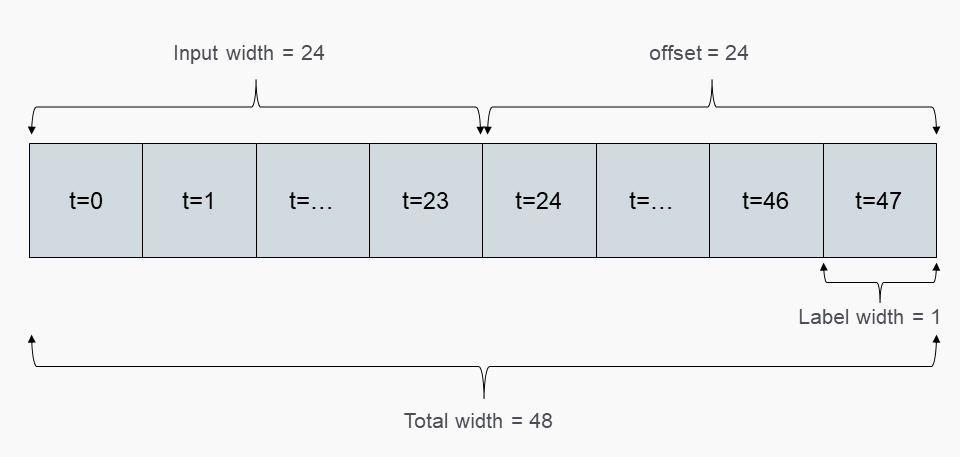

2. A model that makes a prediction 1h into the future, given 6h of history would need a window like this:

  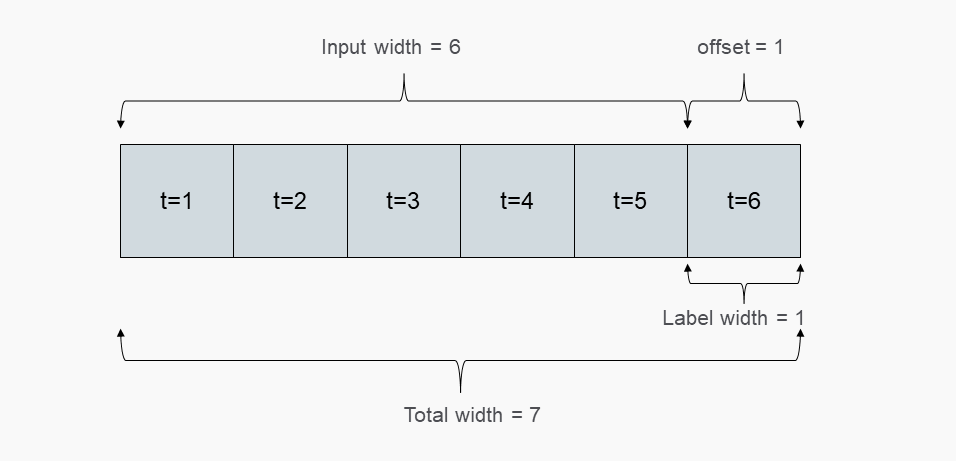

In [ ]:
series = np.array(afrr_germany_df['pos_de'])

In [ ]:
time = np.array(afrr_germany_df.index)

In [ ]:
series.shape, time.shape

((35136,), (35136,))

In [ ]:
# use the next 96 data points (equivalent to 1 day) as validation data
split_time = 35136 - 96
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

# windows size defines, how many input data points are required to predict the next data point
window_size = 30
batch_size = 32
shuffle_buffer_size = 1000

In [ ]:
def windowed_dataset(series, window_size, batch_size):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [ ]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

# Forecast Model

In [ ]:
# univariate data preperation by splitting the samples into windowed dataset
def windowed_sequence(seq, window_size):
    X, y = list(), list()
    for i in range(len(seq)):
        # stop criteria
        last_x = i + window_size
        if last_x > len(seq)-1:
            break
        x_seq, y_seq = seq[i:last_x], seq[last_x]
        X.append(x_seq)
        y.append(y_seq)
    return X, y

In [ ]:
windowed_sequence(x_train[:10], 6)

([array([15.,  9.,  6.,  0., 12.,  7.]),
  array([ 9.,  6.,  0., 12.,  7.,  0.]),
  array([ 6.,  0., 12.,  7.,  0.,  2.]),
  array([ 0., 12.,  7.,  0.,  2., 36.])],
 [0.0, 2.0, 36.0, 9.0])

In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size)
print(train_set)
print(x_train.shape)

<PrefetchDataset shapes: ((None, None, 1), (None, None, 1)), types: (tf.float64, tf.float64)>
(35040,)


In [ ]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
window_size = 64
batch_size = 256
train_set = windowed_dataset(x_train, window_size, batch_size)
print(train_set)
print(x_train.shape)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.LSTM(64, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])

lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(lr=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mse"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])


(1e-08, 0.0001, 10.0, 150.0)

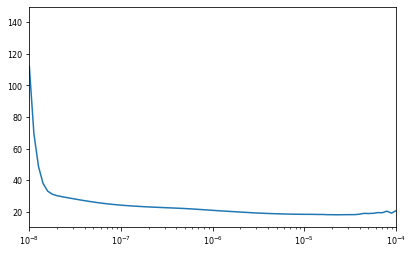

In [ ]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 10, 150])

In [ ]:
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss',
                                                    patience=2,
                                                    mode='min')

tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
train_set = windowed_dataset(x_train, window_size=60, batch_size=100)
model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=60, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.LSTM(60, return_sequences=True),
  tf.keras.layers.Dense(30, activation="relu"),
  tf.keras.layers.Dense(10, activation="relu"),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 400)
])


optimizer = tf.keras.optimizers.SGD(lr=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mse"])
history = model.fit(train_set,epochs=500, callbacks=[early_stopping])

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning:

The `lr` argument is deprecated, use `learning_rate` instead.



Epoch 1/500
350/350 [==============================] - 49s 131ms/step - loss: 22.5132 - mse: 2267.1377
Epoch 2/500
350/350 [==============================] - 46s 131ms/step - loss: 18.5933 - mse: 1543.7225
Epoch 3/500
350/350 [==============================] - 47s 133ms/step - loss: 18.0244 - mse: 1428.9891
Epoch 4/500
350/350 [==============================] - 46s 131ms/step - loss: 17.8415 - mse: 1386.0142
Epoch 5/500
350/350 [==============================] - 46s 132ms/step - loss: 17.7089 - mse: 1361.0067
Epoch 6/500
350/350 [==============================] - 46s 133ms/step - loss: 17.6571 - mse: 1347.0680
Epoch 7/500
350/350 [==============================] - 46s 132ms/step - loss: 17.5829 - mse: 1330.2415
Epoch 8/500
350/350 [==============================] - 46s 132ms/step - loss: 17.5169 - mse: 1320.2529
Epoch 9/500
350/350 [==============================] - 46s 131ms/step - loss: 17.4734 - mse: 1313.5010
Epoch 10/500
350/350 [==============================] - 46s 132ms/step - 

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 60)          360       
_________________________________________________________________
lstm (LSTM)                  (None, None, 60)          29040     
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 60)          29040     
_________________________________________________________________
dense (Dense)                (None, None, 30)          1830      
_________________________________________________________________
dense_1 (Dense)              (None, None, 10)          310       
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           11        
_________________________________________________________________
lambda (Lambda)              (None, None, 1)           0

In [ ]:
model.save('saved_model/my_model')

INFO:tensorflow:Assets written to: saved_model/my_model/assets


INFO:tensorflow:Assets written to: saved_model/my_model/assets


In [ ]:
new_model = tf.keras.models.load_model('saved_model/my_model')

# Check its architecture
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, None, 60)          360       
_________________________________________________________________
lstm (LSTM)                  (None, None, 60)          29040     
_________________________________________________________________
lstm_1 (LSTM)                (None, None, 60)          29040     
_________________________________________________________________
dense (Dense)                (None, None, 30)          1830      
_________________________________________________________________
dense_1 (Dense)              (None, None, 10)          310       
_________________________________________________________________
dense_2 (Dense)              (None, None, 1)           11        
_________________________________________________________________
lambda (Lambda)              (None, None, 1)           0

In [ ]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

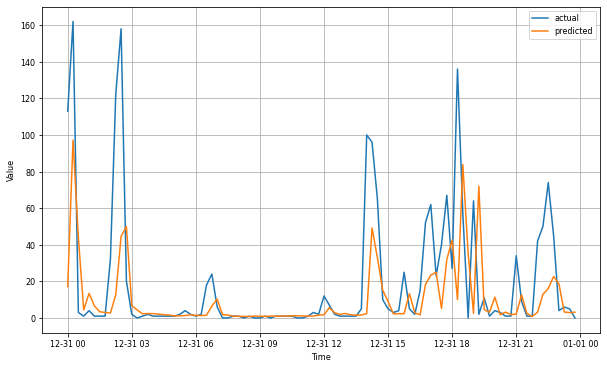

In [ ]:
plt.figure(figsize=(10, 6))
# plot_series(time_valid, x_valid)
# plot_series(time_valid, rnn_forecast)
format="-"
plt.plot(time_valid, x_valid, format, label='actual')
plt.plot(time_valid, rnn_forecast, format, label='predicted')
plt.legend()
plt.xlabel("Time")
plt.ylabel("Value")
plt.grid(True)

plt.savefig(output_dir + 'forecast' + ".pdf", format='pdf', bbox_inches='tight')

In [ ]:
tf.keras.metrics.mean_squared_error(x_valid, rnn_forecast).numpy()

1000.83075

In [ ]:
tf.sqrt(tf.losses.mean_squared_error(x_valid, rnn_forecast)).numpy()

31.63591

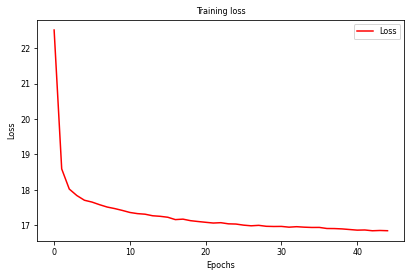

<Figure size 473.225x292.469 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

zoomed_loss = loss
zoomed_epochs = range(200,500)

plt.savefig(output_dir + 'vald_loss' + ".pdf", format='pdf', bbox_inches='tight')

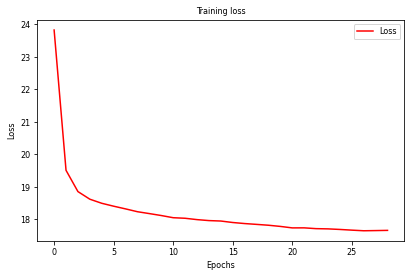

<Figure size 473.225x292.469 with 0 Axes>

In [ ]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs
#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
plt.plot(epochs, loss, 'r')
plt.title('Training loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Loss"])

plt.figure()

zoomed_loss = loss[200:]
zoomed_epochs = range(200,500)

#------------------------------------------------
# Plot training and validation loss per epoch
#------------------------------------------------
# plt.plot(zoomed_epochs, zoomed_loss, 'r')
# plt.title('Training loss')
# plt.xlabel("Epochs")
# plt.ylabel("Loss")
# plt.legend(["Loss"])

# plt.figure()

In [ ]:
print(rnn_forecast)

[ 1.3583564 33.722336  17.479212  ...  1.8319935  2.5193021  1.9936435]
